## Exercise 2: Linear Regression through exact form

#### 1) Generate a simple data i.e. a matrix X with dimensions 100×2. Initialize it with normal distribution µ = 2 and σ = 0.01

#### 2) Generate a simple target vector i.e. a matrix Y with dimensions 100 × 1. Initialize it with random uniform distribution.

**Approach:**
1) First all required modules i.e numpy and matplotlyb are imported.<br>
2) A sample input data "x" of dimension 100X2 with normal distribution is generated.<br> 
   using "np.random.normal()" function.,<br>
3) This functon accepts arguments specifying mean, standard deviation and dimensions of the data respectively.<br>
4) For target vector "Y", "np.random.uniform()" function is used that takes 2 values and dimension of the vector.<br> 
This function assigns values between the given value ranges(includes low-excludes high) uniformly as per the given dimension.

In [115]:
import numpy as np
import matplotlib.pyplot as plt
mu,sigma=2,0.01
m,n=100,2
X=np.random.normal(mu,sigma,(m,n))
Y=np.random.uniform(0,2,(m,1))

##### 3) Implement LEARN-SIMPLE-LINREG algorithm and train it using matrix X to learn values of β0 and β1

#### 4) Instead of solving the system of linear equations, here we ask you to invert the matrix A = $X^{T}.X$.


**Approach:**<br>

I tried to find betas as per given hint i.e,<br>

$betas = (X^{T}.X )^{-1}.( X^T . Y)$ <br>

Here I assumed $A=(X^{T}.X )^{-1}$ and $B= ( X^T . Y)$<br>

Hence, $betas=A^{-1}.B$<br>


For finding **Transpose** of a matrix, a function named "transpose" is defined.<br>
1) I initialised a transposed matrix "a_t" as zero matrix with dimension reverse to that of actual matrix.<br>
2) Using for loops, by iterating over all rows(inner loop), for each column of the actual matrix(outer loop),<br>
each element of transposed matrix is replaced with the element of opposite index i & j of actual matrix


For finding  $X^{T}X$ and $X^{T}Y$,
A **matrix multiplication** function named "mat_mult" is defined.<bt>
This takes 2 matrices a & b as arguments<bt>
    
Through this function, each element of the resultant matrix "c" is filled using 3 for loops.<br>
1) First for loop iterates over  rows of matrix a, <br>
2) second for loop iterates over columns of matrix b <br>
3) In the third loop iterating through each column of matrix a, elements of i_th row in matrix a and j_th column in matrix b, are multiplied and added<br>
   The resultant value is the value of the output matrix at index(i,j) .

In [116]:
#for finding X_transpose
def transpose(a):
    m=a.shape[0]
    n=a.shape[1]
    a_t=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            a_t[i][j]=a[j][i]
    return a_t

#for finding x_t *x and x_t*y
def mat_mult(a,b):
    m=a.shape[0]
    n=a.shape[1]
    o=b.shape[1]
    c=np.zeros((m,o))
    for i in range(m):
        for j in range(o):
            for k in range(n):
                c[i][j]+=a[i][k]*b[k][j]    
    return c


In [117]:
# finding A=x_t *x and B=x_t *y 
X_t=transpose(X)
A=mat_mult(X_t,X)
B=mat_mult(X_t,Y)


### Finding the inverse of A:

Here result of $ A=X^{T}X$ is a 2X2 matrix<BR>
For finding the inverse of matrix "A", I followed the following solution and defined a function" Inverse_A" according to it. <BR>
The function takes a 2X2 matrix as argument.<BR> 
In the function, determinant and adjoint of the matrix are calculated as per the formula given below.<BR>
Then $A^{-1}$ is calculated by $det^{-1}*adj(A)$

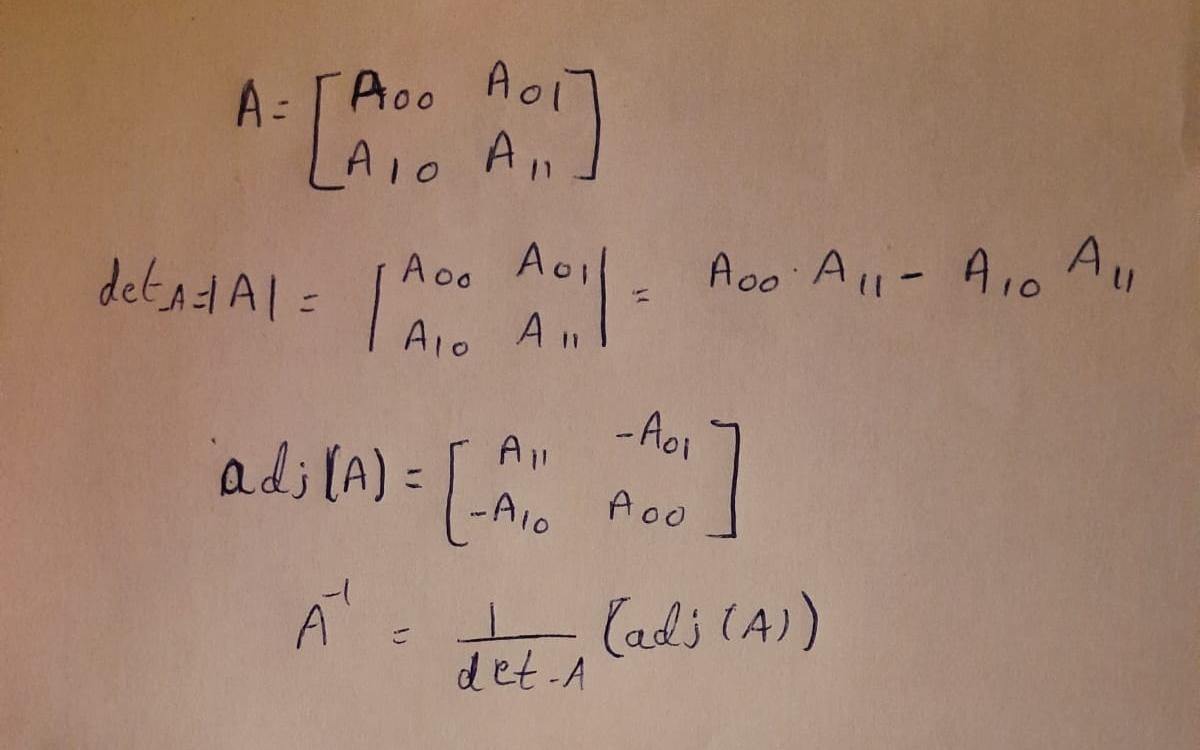

In [118]:
#inverse of a 2X2 matrix 
def inverse_A(A):
    det_A=A[0][0]*A[1][1]-A[0][1]*A[1][0]
    adj=np.zeros((2,2))
    adj=[[A[1][1],-A[0][1]],[-A[1][0],A[0][0]]]
    A_inv=adj/det_A
    return A_inv

A_inv=inverse_A(A)


#### Finding betas
Betas are found as per the formula betas= $(X^{T}X)^{-1}*X^{T}Y$ = $A^{-1}*B$<br>

Using defined "mat_mult" function $A^{-1}$ is multiplied with $B$ to get beta values. <br>
Here betas is a 2X1 matrix. For printing each beta value I used indexing.


In [119]:

betas=mat_mult(A_inv,B)
print("beta0 is",np.round(betas[0],2),"and beta1 is",np.round(betas[1],2))

beta0 is [-1.87] and beta1 is [2.36]


**5. Implement PREDICT-SIMPLE-LINREG and calculate the points for each training example in matrix A**<br>
**6. Plot the training points from matrix Y and predicted values in the form of scatter graph**

**Approach:**
1) As per the formula y=x*betas, X (100x2) and betas(2X1) are multiplied using "mat_mult" function to get predicted output y_hat(100X1) <br>
2) Then scatter plot is drwan using matplot. For scatter plot, predicted y is on y axis, traiing points of Y is onn x axis.


In [120]:
y_hat=mat_mult(X,betas)
y_hat.shape

(100, 1)

From the scatter graph, it is observed that,the predicted values are ranging from 0.925 to 1.075 and ground truth    values are ranging from 0 to 2. we see the relative error is less at the centre portion of the graph i.e around  0.975 to 1. And the relative error is high at other regions


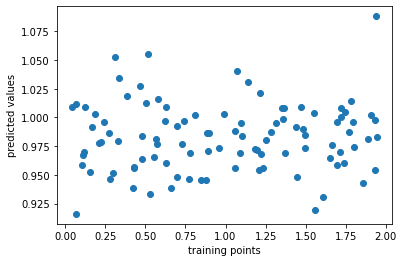

In [123]:
plt.xlabel("training points")
plt.ylabel("predicted values")
plt.scatter(Y,y_hat)
print("From the scatter graph, it is observed that,the predicted values are ranging from 0.925 to 1.075",
                "and ground truth    values are ranging from 0 to 2."
      " we see the relative error is less at the centre portion of the graph i.e around  0.975 to 1. "
      "And the relative error is high at other regions")

#### 7. In the end use numpy.linalg lstsq to replace step 2 for learning values of β0 and β1.

np.linalg.lstsq is used which accepts training points X and Y as inputs

In [122]:
np.linalg.lstsq(X, Y, rcond=None)[0]

array([[-1.86961942],
       [ 2.35815639]])

In [124]:
print(" Beta values learnt from inverse method and linalg method are same")

 Beta values learnt from inverse method and linalg method are same
